In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(500, 500, 3)


(-0.5, 499.5, 499.5, -0.5)

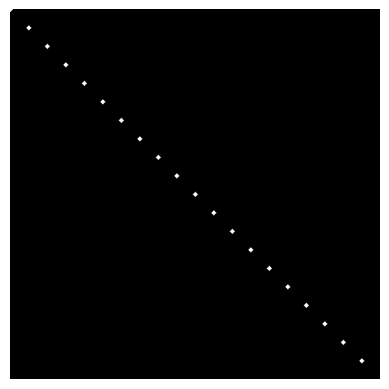

In [15]:
# 1. empty images
height = 500
width  = 500
im_bgr = np.zeros([height, width, 3], dtype=np.uint8)

# 2. draw points on the lines 
pt1 = (0, 0)
pt2 = (width, height)


step = 25
num_inliers = 500//25
pts_line = np.zeros([500//step, 2], dtype= np.int32)

print(im_bgr.shape)

for x in range(0,500,step):
    im = cv2.drawMarker(im_bgr, (x,x), (255,255,255), cv2.MARKER_CROSS, markerSize=5,thickness=2)
    pts_line[x//step] = (x,x)

    
#im_bgr = cv2.line(im_bgr, pt1, pt2, color =(255,255,255), thickness=1)
plt.imshow(im_bgr[:,:,::-1])
plt.axis('off')


(-0.5, 499.5, 499.5, -0.5)

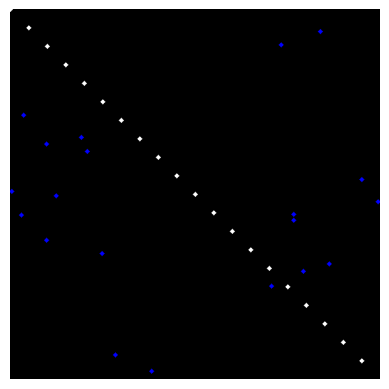

In [16]:
# 3. make a random points 
num_outliers = 20
noise = np.random.randint(0, 500, [num_outliers,2], np.int32)

for i in range(num_outliers):
    x, y = noise[i] 
    #im_bgr[y, x] = (0, 0, 255)
    im = cv2.drawMarker(im_bgr, (x,y), (255,0,0), cv2.MARKER_CROSS, markerSize=5,thickness=2)

    
plt.imshow(im_bgr[:,:,::-1])
plt.axis('off')


[24] [13]
[18] [2]
[18] [18]
[15] [26]
[12] [38]


(-0.5, 499.5, 499.5, -0.5)

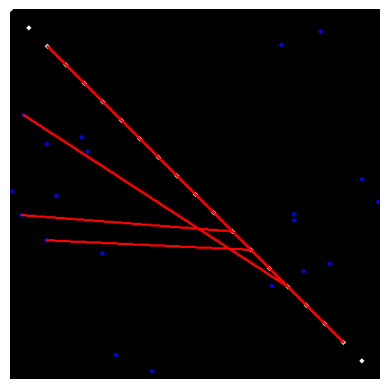

In [17]:
     
# 4. RANSAC 준비: 두점을 랜던하게 5개를 선택하여 선을 그려본다. 
pts_total =  np.concatenate((pts_line , noise), axis=0)
num_pts = num_outliers + num_inliers
for i in range(5):
    i1 = np.random.randint(0, num_pts, 1, np.int32)
    i2 = np.random.randint(0, num_pts, 1, np.int32)
    pt1 = (pts_total[i1, 0],pts_total[i1, 1]) 
    pt2 = (pts_total[i2, 0],pts_total[i2, 1]) 
    #print(tuple(pt1), tuple(pt2))
    print(i1, i2)
    cv2.line(im_bgr, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), color =(0,0,255), thickness=2)


plt.imshow(im_bgr[:,:,::-1])
plt.axis('off')
